# Company Financials Dataset

Este conjunto de datos es un archivo que representa un resumen de ventas y beneficios por mercado, país/región, producto y otros factores clave. 

A continuación se presenta un desglose detallado de cada columna: 

* **Segment**: Representa el segmento de mercado (*e.g., Government, Midmarket, Enterprise*). Sirve para identificar la contribución de cada segmento al total de las ventas y beneficios.
* **Country**: Es el país o región donde se realizaron las ventas. Permite localizar los mercados más fuertes geográficamente.
* **Product**: El tipo de producto vendido (*e.g., Carretera, Montana, Paseo*). Esto ayuda a analizar qué productos son los más populares y rentables.
* **Discount Band**: Representa el nivel de descuento aplicado. En este caso, parece que todos los descuentos son "None", lo que indica que no hubo descuentos aplicados directamente.
* **Units Sold**: El número de unidades vendidas. Es un factor clave para calcular las métricas de ventas y beneficios.
* **Manufacturing Price**: El costo de fabricación por unidad del producto. Sirve para calcular márgenes de ganancia.
* **Sale Price**: El precio de venta por unidad. Refleja la estrategia de precios de la empresa.
* **Gross Sales**: Ingresos brutos generados antes de aplicar descuentos. Calculado como:

        Gross Sales = Units Sold x Sale Price

* **Discounts**: Los descuentos totales aplicados. En este dataset aparecen como $-, lo que implica que no hubo descuentos registrados.
* **Sales**: Ventas netas, después de descuentos. En este caso, como no hay descuentos, **Gross Sales = Sales**.
* **COGS** (Cost of Goods Sold): El costo de los bienes vendidos. Calculado como:

        COGS = Units Sold x Manufacturing Price

* **Profit**: La ganancia neta obtenida. Calculada como:

        Profit = Sales - COGS

* **Date, Month Number, Month Name, Year**: Información temporal que detalla cuándo se realizó la venta. Esto es útil para identificar tendencias estacionales y patrones de compra.

## Lectura de Datos

In [20]:
pip install pandas matplotlib seaborn plotly geopandas folium


   ---------------------------------------- 0.0/323.6 kB ? eta -:--:--
   ------------ --------------------------- 102.4/323.6 kB 3.0 MB/s eta 0:00:01
   ---------------------------------------- 323.6/323.6 kB 5.0 MB/s eta 0:00:00
   ---------------------------------------- 0.0/110.5 kB ? eta -:--:--
   ---------------------------------------- 110.5/110.5 kB 6.7 MB/s eta 0:00:00
   ---------------------------------------- 0.0/16.2 MB ? eta -:--:--
    --------------------------------------- 0.3/16.2 MB 6.3 MB/s eta 0:00:03
   - -------------------------------------- 0.7/16.2 MB 8.3 MB/s eta 0:00:02
   -- ------------------------------------- 1.1/16.2 MB 7.6 MB/s eta 0:00:02
   --- ------------------------------------ 1.4/16.2 MB 7.0 MB/s eta 0:00:03
   --- ------------------------------------ 1.5/16.2 MB 7.3 MB/s eta 0:00:03
   --- ------------------------------------ 1.5/16.2 MB 7.3 MB/s eta 0:00:03
   --- ------------------------------------ 1.6/16.2 MB 5.3 MB/s eta 0:00:03
   --- --

In [15]:
import csv as csv
from statistics import mean
import pandas as pd

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn as sns
import plotly.express as px
import geopandas as gpd
import folium

In [18]:
from IPython.display import display
display(datos_df)

,Segment,Country,Product,Discount Band,Units Sold,Manufacturing Price,Sale Price,Gross Sales,Discounts,Sales,COGS,Profit,Date,Month Number,Month Name,Year
0,Government,Canada,Carretera,None,"$1,618.50",$3.00,$20.00,"$32,370.00",$-,"$32,370.00","$16,185.00","$16,185.00",01/01/2014,1,January,2014
1,Government,Germany,Carretera,None,"$1,321.00",$3.00,$20.00,"$26,420.00",$-,"$26,420.00","$13,210.00","$13,210.00",01/01/2014,1,January,2014
2,Midmarket,France,Carretera,None,"$2,178.00",$3.00,$15.00,"$32,670.00",$-,"$32,670.00","$21,780.00","$10,890.00",01/06/2014,6,June,2014
3,Midmarket,Germany,Carretera,None,$888.00,$3.00,$15.00,"$13,320.00",$-,"$13,320.00","$8,880.00","$4,440.00",01/06/2014,6,June,2014
4,Midmarket,Mexico,Carretera,None,"$2,470.00",$3.00,$15.00,"$37,050.00",$-,"$37,050.00","$24,700.00","$12,350.00",01/06/2014,6,June,2014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
695,Small Business,France,Amarilla,High,"$2,475.00",$260.00,$300.00,"$7,42,500.00","$1,11,375.00","$6,31,125.00","$6,18,750.00","$12,375.00",01/03/2014,3,March,2014
696,Small Business,Mexico,Amarilla,High,$546.00,$260.00,$300.00,"$1,63,800.00","$24,570.00","$1,39,230.00","$1,36,500.00","$2,730.00",01/10/2014,10,October,2014
697,Government,Mexico,Montana,High,"$1,368.00",$5.00,$7.00,"$9,576.00","$1,436.40","$8,139.60","$6,840.00","$1,299.60",01/02/2014,2,February,2014
698,Government,Canada,Paseo,High,$723.00,$10.00,$7.00,"$5,061.00",$759.15,"$4,301.85","$3,615.00",$686.85,01/04/2014,4,April,2014


In [17]:
datos_df = pd.read_csv('./data/Financials.csv')
datos_df.head()

,Segment,Country,Product,Discount Band,Units Sold,Manufacturing Price,Sale Price,Gross Sales,Discounts,Sales,COGS,Profit,Date,Month Number,Month Name,Year
0,Government,Canada,Carretera,None,"$1,618.50",$3.00,$20.00,"$32,370.00",$-,"$32,370.00","$16,185.00","$16,185.00",01/01/2014,1,January,2014
1,Government,Germany,Carretera,None,"$1,321.00",$3.00,$20.00,"$26,420.00",$-,"$26,420.00","$13,210.00","$13,210.00",01/01/2014,1,January,2014
2,Midmarket,France,Carretera,None,"$2,178.00",$3.00,$15.00,"$32,670.00",$-,"$32,670.00","$21,780.00","$10,890.00",01/06/2014,6,June,2014
3,Midmarket,Germany,Carretera,None,$888.00,$3.00,$15.00,"$13,320.00",$-,"$13,320.00","$8,880.00","$4,440.00",01/06/2014,6,June,2014
4,Midmarket,Mexico,Carretera,None,"$2,470.00",$3.00,$15.00,"$37,050.00",$-,"$37,050.00","$24,700.00","$12,350.00",01/06/2014,6,June,2014


### Información general y descripción estadística

In [25]:
#Column type
datos_df.dtypes

Segment                  object
Country                  object
 Product                 object
 Discount Band           object
 Units Sold              object
 Manufacturing Price     object
 Sale Price              object
 Gross Sales             object
 Discounts               object
  Sales                  object
 COGS                    object
 Profit                  object
Date                     object
Month Number              int64
 Month Name              object
Year                      int64
dtype: object

In [26]:
print(datos_df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Segment                700 non-null    object
 1   Country                700 non-null    object
 2    Product               700 non-null    object
 3    Discount Band         700 non-null    object
 4    Units Sold            700 non-null    object
 5    Manufacturing Price   700 non-null    object
 6    Sale Price            700 non-null    object
 7    Gross Sales           700 non-null    object
 8    Discounts             700 non-null    object
 9     Sales                700 non-null    object
 10   COGS                  700 non-null    object
 11   Profit                700 non-null    object
 12  Date                   700 non-null    object
 13  Month Number           700 non-null    int64 
 14   Month Name            700 non-null    object
 15  Year                   

In [27]:
datos_df.describe()

,Month Number,Year
count,700.000000,700.000000
mean,7.900000,2013.750000
std,3.377321,0.433322
min,1.000000,2013.000000
25%,5.750000,2013.750000
50%,9.000000,2014.000000
75%,10.250000,2014.000000
max,12.000000,2014.000000


## Preprocesamiento

### Limpieza de Datos

Se comenzará el preprocesamiento de los datos con una limpieza básica de ellos. El primer paso será entonces detectar la existencia de valores nulos en el conjunto de datos:

In [23]:

datos_df.isnull().sum()

Segment                  0
Country                  0
 Product                 0
 Discount Band           0
 Units Sold              0
 Manufacturing Price     0
 Sale Price              0
 Gross Sales             0
 Discounts               0
  Sales                  0
 COGS                    0
 Profit                  0
Date                     0
Month Number             0
 Month Name              0
Year                     0
dtype: int64

No existe ningún valor nulo o faltante en nuestro CSV. 


A continuación se muestra una fila completa del conjutno de datos:

Midmarket,France, Paseo , None , $549.00 , $10.00 , $15.00 ," $8,235.00 ", $-   ," $8,235.00 "," $5,490.00 "," $2,745.00 ",01/09/2013,9, September ,2013

Como puede observarse, existen carácteres especiales que han de ser eliminados del dataset para poder trabajar de forma correcta con los datos. 

### Visualización de distribuciones

Usamos gráficos para analizar distribuciones y relaciones iniciales

#### Histogramas

array([[<Axes: title={'center': 'Month Number'}>,
        <Axes: title={'center': 'Year'}>]], dtype=object)

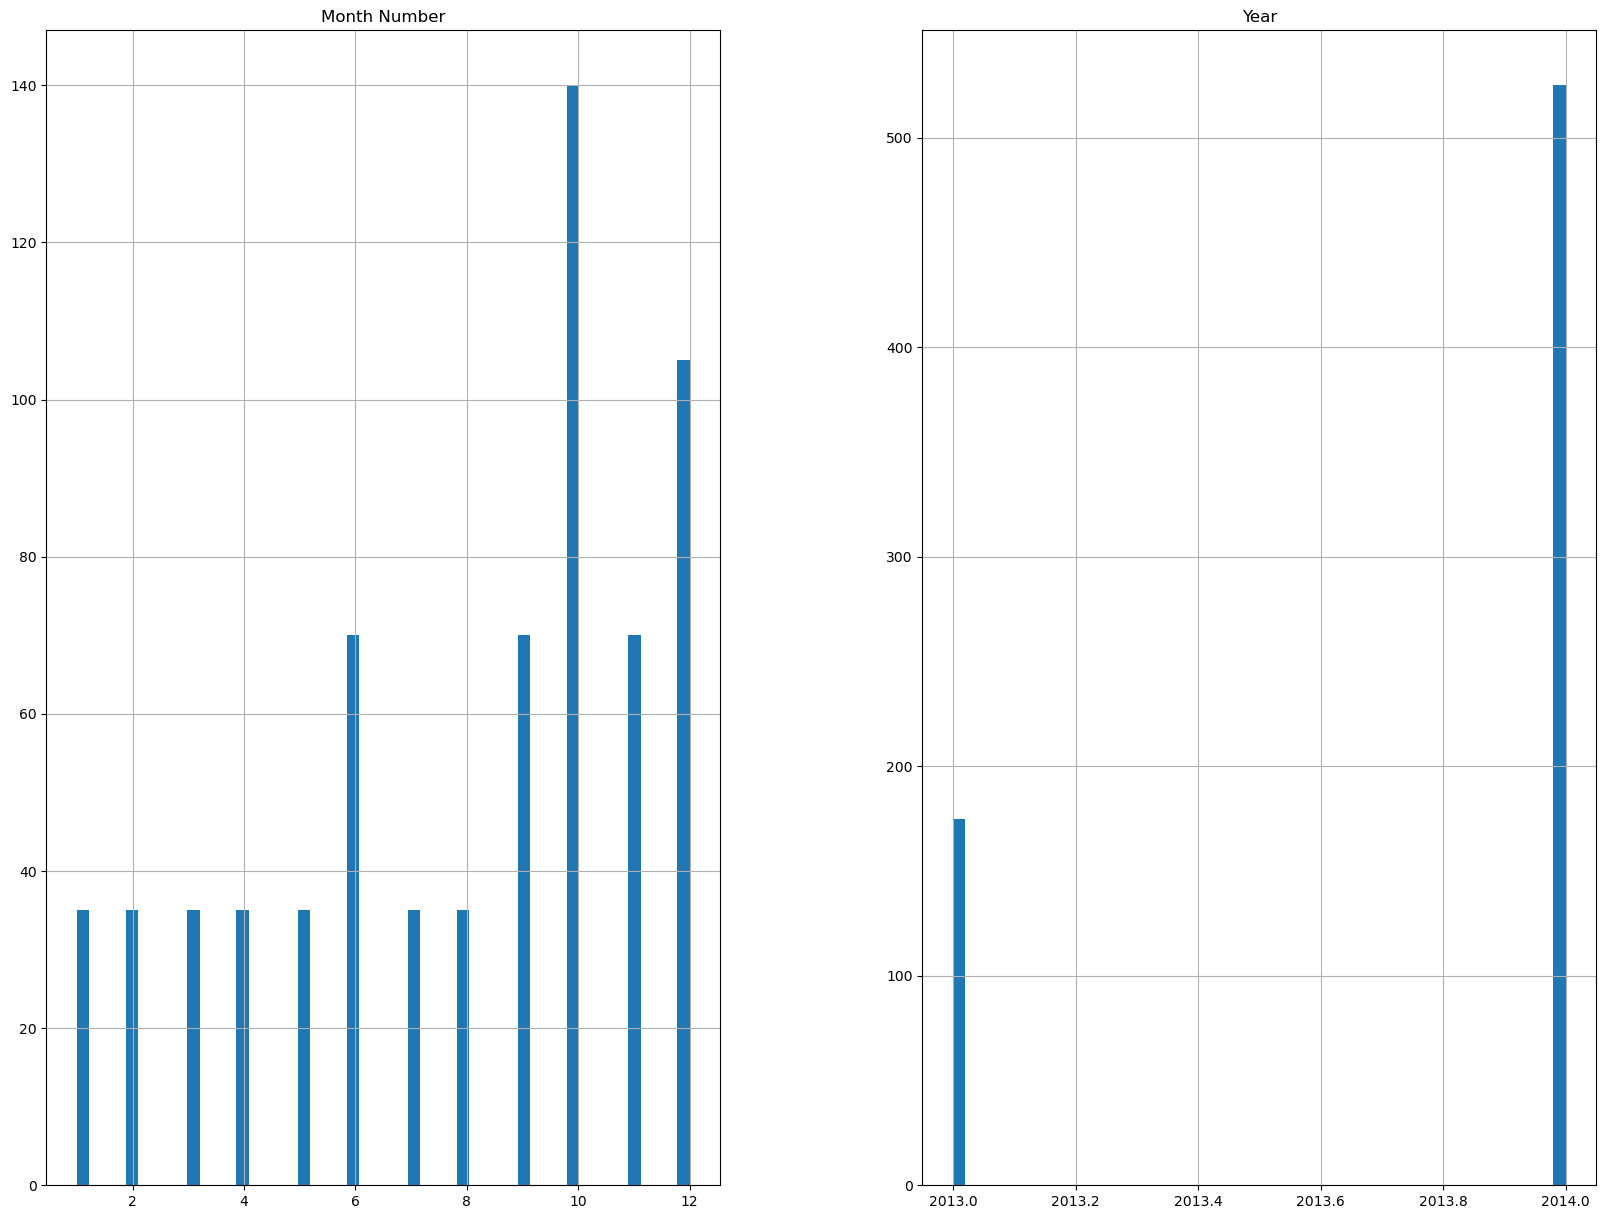

In [24]:
#histograma de todas las columnas
datos_df.hist(bins=50, figsize=(20,15))